# __Regression__

    This notebook tests the different performances of regression algorithms on a simple dataset called Position Salaries that defines the salary of a an employee at different levels in the organization.

#### __Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

#### __Load Datasets__

In [2]:
data = pd.read_csv("./data/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### __Dataset Information__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


#### __Null Value Count__

In [4]:
print(f"Number of null values in the dataframe: {data.isnull().values.sum()}")

data.isnull().any()

Number of null values in the dataframe: 0


Position    False
Level       False
Salary      False
dtype: bool

#### __Encoding__

In [5]:
lab_en = preprocessing.LabelEncoder() 
data['Position']= lab_en.fit_transform(data['Position'])

data

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


#### __Correlation Matrix__

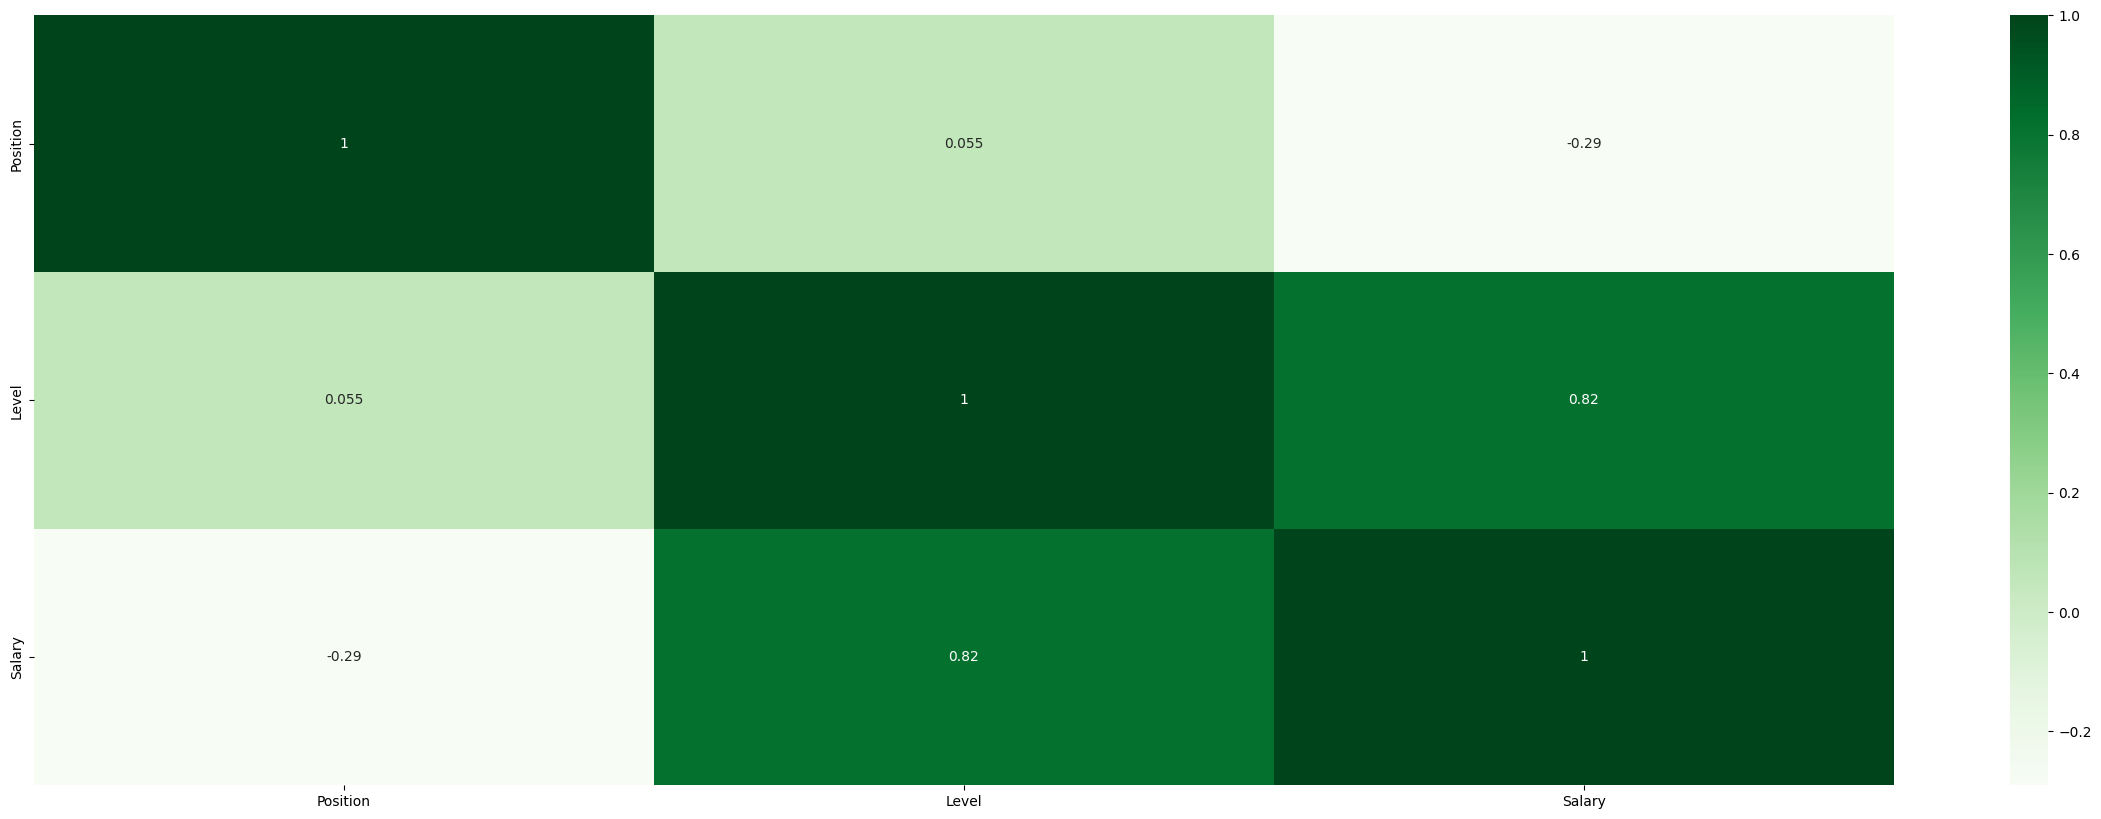

In [6]:
corr = data.corr()
plt.figure(figsize = (30 ,10))
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

#### __Correlation Score with the Inference Column__

In [7]:
cor = data.corr()
cor.nlargest(3,'Salary')['Salary']

Salary      1.000000
Level       0.817949
Position   -0.290220
Name: Salary, dtype: float64

#### __Selecting requisite data for visualization__

In [8]:
X_data = pd.DataFrame(data.loc[:, "Level"])
Y_data = pd.DataFrame(data.loc[:, "Salary"])

#### __Feature Scaling__

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X_data)
Y = sc_y.fit_transform(Y_data)

#### __*Simple Linear Regression*__

In [10]:
l_reg = LinearRegression()
l_reg.fit(X, Y)

LinearRegression()

#### __Visualizing Training Dataset__

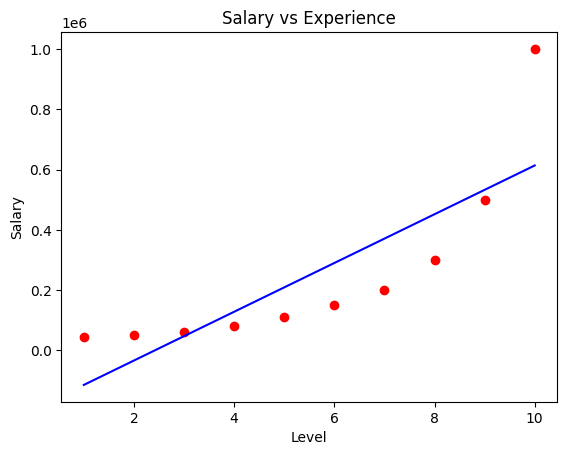

In [11]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(l_reg.predict(X)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### __*Polynomial Regression*__

In [12]:
ply_reg = PolynomialFeatures(degree=6)
X_poly = ply_reg.fit_transform(X)

l_reg_2 = LinearRegression()
l_reg_2.fit(X_poly, Y)

LinearRegression()

#### __Visualizing dataset__

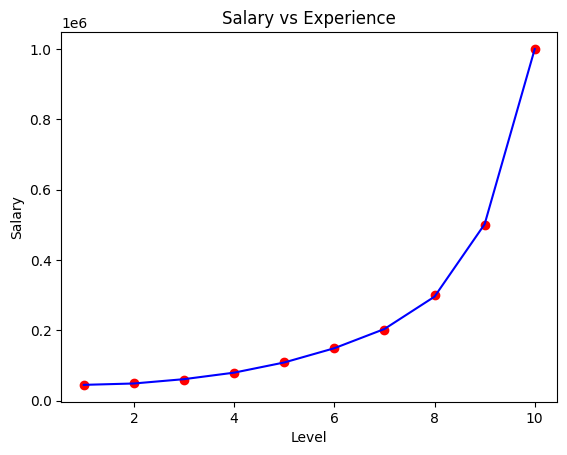

In [13]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(l_reg_2.predict(ply_reg.fit_transform(X)).reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### __Visualizing dataset with smoother curve__

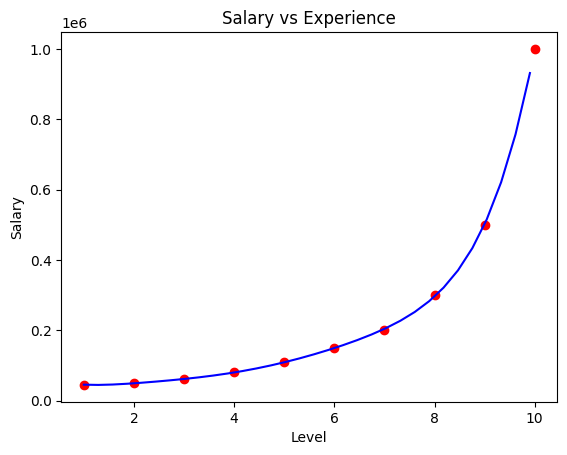

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X_grid), sc_y.inverse_transform(l_reg_2.predict(ply_reg.fit_transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### __*Decision Trees*__

In [15]:
d_trees = DecisionTreeRegressor(random_state = 6497)
d_trees.fit(X, Y.flatten())

DecisionTreeRegressor(random_state=6497)

#### __Visualizing Dataset__

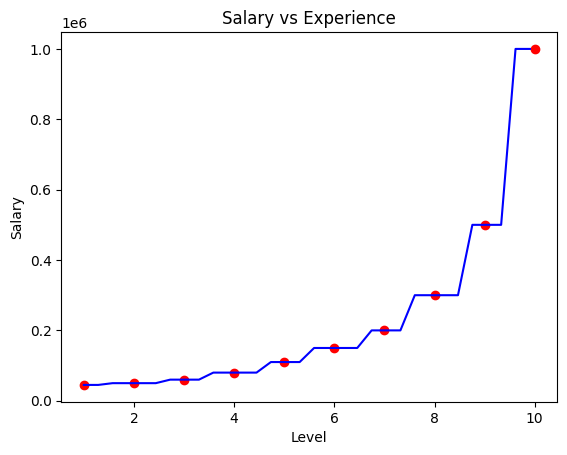

In [16]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X_grid), sc_y.inverse_transform(d_trees.predict(X_grid).reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### __*Random Forests*__

In [17]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 6497)
rf.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=6497)

#### __Visualizing Dataset__

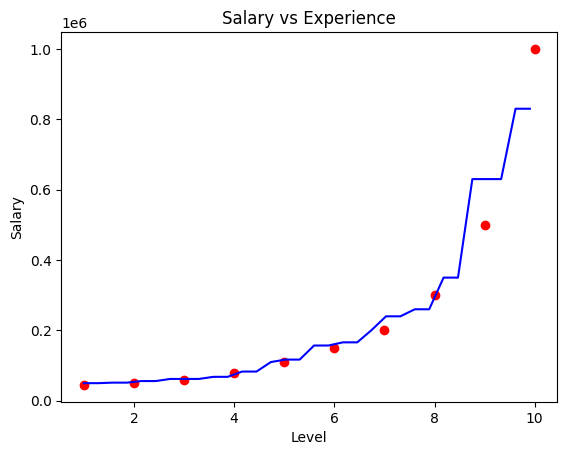

In [18]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X_grid), sc_y.inverse_transform(rf.predict(X_grid).reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### __*Support Vector Machines*__

In [19]:
svm = SVR(kernel='rbf')
svm.fit(X, Y)

SVR()

#### __Visualizing Dataset__

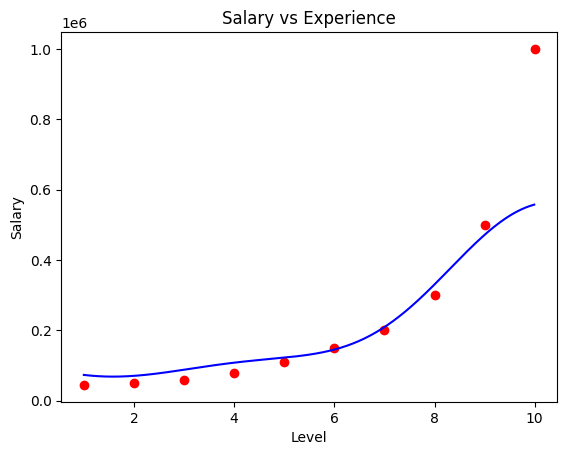

In [20]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_x.inverse_transform(X_grid), sc_y.inverse_transform(svm.predict(X_grid).reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()